## Imports and preamble

These are external libraries, including your own code stored in separate .py files, that you want to import in order to run the notebook. Since our notebook environment is running in Python, we don't need to import the language itself.

 However, it's worth checking that you are using the right version of Python (usually Python 3)

 For larger projects, you will want to use separate virtual environments for different projects. It's a good idea to double check your environment

In [22]:
# pre-installed library containing a grab bag of system functions
import sys
print(sys.version)

# Import some local code, which I'll use behind the scenes
# from ../resources import helper_functions

# Wipe all outputs from this notebook
from IPython.display import Image, clear_output
clear_output(True)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline


3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]


# Why Python?

+ Interpreted language
+ Extensible, plenty of external models available in other domains

Other good options for computational physics

+ C/C++
+ Mathematica

Keeping an eye on

+ Julia
+ Rust
+ Haskell

Specialized

+ R
+ MATLAB
+ Perl





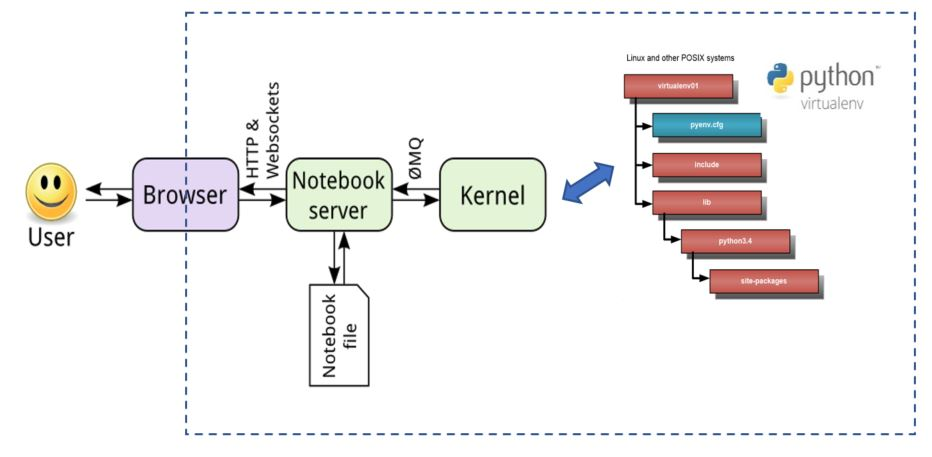

In [23]:
Image("../resources/jupyterkernels.jpg")
# Source: https://anchormen.nl/blog/big-data-services/pyspark-jupyter-kernels/

# Python basics

In [26]:
## Assigning variables, pass by value for immutable types

a = 1
b = 2
print(a, b)

temp = a
a = b
b = temp
print(a, b)

a, b = b, a
print(a, b)

1 2
2 1
1 2


# Built-in data types

+ Given information: detector counts, velocities, temperatures, how do we store it
+ Because Python is object-oriented, we will eventually build more esoteric objects by composing built-in data structures
+ In scientific computing: lists, numpy arrays, dicts, and strings are the most common datatypes (lists, strings, and dicts are native). 


### Lists

+ Ordered sets of objects
+ Can mix different types
+ Can contain duplicates
+ Similar to stacks in other languages

In [30]:
xs = list(range(10)) # casts to list
print(xs)

## Find length
print(len(xs))

## Add element to back
xs.append(11)
print(xs)

## Count number of occurrences of a value
xs.count(6)
print(xs)

xs.insert(7, 8.5)
print(xs)

xs.sort() # alternative: sorted(xs) returns a sorted copy
print(xs)

# Remove element based on value
xs.remove(8)
print(xs)


## Remove element from back and return it
## Similar to a stack in other languages
print(xs.pop()) 
print(xs)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 6, 8.5, 7, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 8.5, 9, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8.5, 9, 11]
11
[0, 1, 2, 3, 4, 5, 6, 7, 8.5, 9]


In [31]:
## Slice notation

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



# slicing up lists:
print("\n", "Slicing syntax.")
print(a[0]) # zero-indexed
print(a[2:4]) # returns neq list [a[2], a[3]] (it doesn't include a[4])
print(a[2:])  # this notation starts with a[2] and goes to the end
print(a[:4])  # this starts at the beginning and goes up until a[3]
print(a[:])   # this just returns a copy of the whole list

print("\n", "Negative indices count from the end.")
print(a[-1])    # last element
print(a[:-1])   # this goes up until the last element
print(a[-3:])   # this goes from the third-to-last element to the end



0

 Slicing syntax.
[2, 3]
[2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 Negative indices count from the end.
9
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[7, 8, 9]


In [33]:
# Standard loop
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
    a[i] = a[i] ** 2
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [34]:
# List comprehension
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [i ** 2 for i in a]
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [35]:
# List comprehension with conditionals
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [i ** 2 for i in a if i % 2 == 0]
print(a)

[0, 4, 16, 36, 64]


In [36]:
# Map
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = list(map(lambda x: x ** 2, a))
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [41]:
# Map with filter
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = list(map(
    lambda x: x ** 2,
    filter(lambda x: x % 2 == 0, a)
))
print(a)

[0, 4, 16, 36, 64]


In [18]:
# Pass by value
a = [1, 2, 3]
b = a[0]
print(a, b)

a[0] = 9
print(a, b)

b = 9
print(a, b)

[1, 2, 3] 1
[9, 2, 3] 1
[9, 2, 3] 9


In [46]:
# Pass by reference. Python lists are mutable
a = [1, 2, 3]
b = a
print(a, b)

a[0] = 9
print(a, b)

a = [1, 2, 3]
b = a.copy()
a[0] = 9
print(a, b)

[1, 2, 3] [1, 2, 3]
[9, 2, 3] [9, 2, 3]
[9, 2, 3] [1, 2, 3]


In [45]:
# Pass by reference matters with weird objects we don't know about, which are usually
# mutable

class SomeWeirdObject:
    def __init__(self):
        self.some_weird_property = "some value"

a = SomeWeirdObject()
print(a.some_weird_property)

b = a
b.some_weird_property = "some other value"
print(a.some_weird_property)


some value
some other value


# Abstract data types


Abstract data types (how Python built-ins operate behind the scenes)

+ Hash tables
+ Linked Lists
+ Stacks
+ Queues
+ Heaps / Priority Queues
+ Trees

Each structure represents a different abstract way that data is represented and stored. Each has different costs to read, write, search, etc for value. 

Data type of choice depends on
1. Intrinsic structure of data. For example, spatial coordinates are ordered, making a lists a good choice
2. Whether you are reading or writing to structure more often
3. Whether memory or clock speed are your limiting variables

Next week: Runtime and space complexity and Big-O notation; how does the runtime and space usage of different datatypes, and operations acting on them, change with the size of their input $N$

# Printing and strings

(Skip this in class)

In [59]:
# print statement

print("Hello world")

print("Hello", "world")

msg = "Hello"
msg += " world"
print(msg)

msg = " ".join(["Hello", "world"])
print(msg)

a = 7
print(f"Hello World {a}")


Hello world
Hello world
Hello world
Hello world
Hello World 7


In [61]:
## During a long computation, you can force Python to print out the progress of the computation


import time
print("Begin long computation without flushing")
for i in range(100):
    time.sleep(0.05)
    if i == 0:
        print("40 iterations complete")

print("Begin long computation with flushing")
import time
for i in range(100):
    time.sleep(0.05)
    if i == 4:
        print("40 iterations complete", flush=True)


Begin long computation without flushing
40 iterations complete
Begin long computation with flushing
40 iterations complete


# Functions

+ keyword arguments
+ local variable scope
+ globals
+ docstring

In [ ]:
def ar1_process(x, alpha, sigma):
    return alpha * x + sigma * np.random.randn()


def ornstein_uhlenbeck_process(x, alpha, sigma):
    """
    The position of a particle in a harmonic potential, with Brownian noise

    Equivalent to an AR(1) process with alpha = 1
    """
    return alpha * (0 - x) + sigma * np.random.randn()

plt.plot()


In [ ]:
## Can pass functions as arguments

def kinematic_drag_linear(a, gamma=1.0):
    """A linear drag function"""
    return gamma * a

def kinematic_drag_quadratic(a, gamma=1.0):
    """A quadratic drag function"""
    return gamma * a**2

def simulate_drag(a, drag_function):
    for i in range(100):
        kinematic_drag_linear(a, gamma)




In [ ]:
## Lambda function shorthand
linear_drag = lambda x, gamma: gamma * x
quadratic_drag = lambda x, gamma: gamma * x



In [ ]:
# Can pass functions as arguments


def mean(mylist):
    """Return the mean of a list of numbers"""
    return sum(mylist) / len(mylist)

def median(mylist):
    """Return the median of a list of numbers"""
    mylist.sort() # get set of numbers in order

    # even number of elements
    if len(mylist) % 2 == 0:
        return (mylist[len(mylist) // 2] + mylist[len(mylist) // 2 - 1]) / 2

    # odd number of elements
    else:
        return mylist[len(mylist) // 2]




#### Objects

+ We will discuss these in details in future lectures
+ Custom bags of functions and variables tied into a single package
+ Critical for writing high-level abstract code

In [85]:
# Objects

# Loops and control flow



$$
\mathcal{L} ={\tfrac {1}{2}}m\left(v_{1}^{2}+v_{2}^{2}\right)+{\tfrac {1}{2}}I\left({{\dot {\theta }}_{1}}^{2}+{{\dot {\theta }}_{2}}^{2}\right)-mg\left(y_{1}+y_{2}\right)
$$

In [ ]:
g = 9.82 # global variable

class DifferentialEquation:

    def __init__(self):
        pass

    def step(t, y):
        return y

    def integrate(self, t0, y0, t1):
        """Simulate a differential Equation using Euler's method"""

class DoublePendulum:

    def __init__(self):
        self.g = 9.82
    
    @staticmethod
    def cartesian_to_polar(coords):
        """Convert an N, D list of Cartesian coordinats to polar coordinates"""



# External libraries

+ The best part of the Python ecosystem
+ Common libraries you might use in the sciences include
+ + matplotlib (plotting)
+ + numpy (linear algebra; lots of MATLAB functions)
+ + scipy (common scientific algorithms)
+ + scikit-learn (machine learning)
+ + numba (just-in-time compilation of numpy-based code)
+ + pandas (large dataset organization; lots of R functionality)
+ + statsmodels (statistics; lots of R functionality)
+ + seaborn (plotting; alternative to matplotlib with API similar to R's ggplot)
+ + PyTorch (deep learning)
+ + JAX (deep learning)


Typical usage (in terminal): install 

    conda activate myenvironment
    conda install pandas

Then either launch launch JupyterLab from terminal, or open VSCode app and select the appropriate environment in the upper-right hand corner


In [ ]:
import matplotlib.pyplot as plt # Plotting library
import numpy as np # Linear algebra library
import scipy # General scientific computing library


## Arrays, broadcasting, vectorization

+ Numpy is technically an external library, but we will use it so often in scientific computing that it's basically a built-in data type

    import numpy as np

+ Suite of support for the np.ndarray datatype, which represents tensors. Most MATLAB functions are within numpy

In [2]:
import numpy as np

a = np.ones(1000)

# What is the memory and runtime complexity of this function?
def sum_iterative(a):
    """Sum the elements in an iterable"""
    total = 0
    for i in range(len(a)):
        total += a[i]
    return total

%timeit sum_iterative(a)
%timeit np.sum(a)



116 µs ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.74 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Text(0, 0.5, 'Runtime (s)')

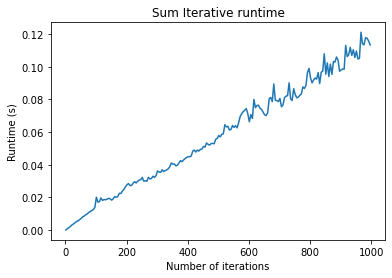

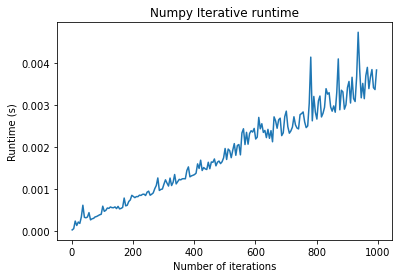

In [18]:
import timeit

n_vals = np.arange(1, 1000, 5)

times1 = []
times2 = []
for n in n_vals:
    times1.append(timeit.timeit("sum_iterative(a)", globals=globals(), number=n))
    times2.append(timeit.timeit("np.sum(a)", globals=globals(), number=n))



plt.figure()
plt.plot(n_vals, times1)
plt.title("Sum Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, times2)
plt.title("Numpy Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")


#### Broadcasting

+ We can slice numpy arrays just like lists, but in multiple dimensions
+ singleton dimensions versus empty dimensions
+ Lifting dimensionality makes linear algebra easier

In [71]:
positions = np.random.random(size=(1000,))

print("Empty dimensions", positions.shape) # Elementwise (Hadamard)
print((positions * positions.T).shape)


Empty dimensions (1000,)
(1000,)


In [70]:
positions = np.random.random(size=(1000,))
positions = positions[:, None]

print("Singleton dimensions", positions.shape)
print((positions * positions.T).shape) # Outer product

Singleton dimensions (1000, 1)
(1000, 1000)


#### Vectorization

+ Does not change runtime scaling, but changes the prefactor
+ Runtime at expense of memory

In [77]:
# Random positions dataset
positions = np.random.random(size=(100, 2))

In [78]:

# pairwise distance matrix
def find_distances_iterative(positions):
    """Find the pairwise distances between a set of points"""
    list_of_distances = list()
    for i in range(positions.shape[0]):
        row_distances = list()
        for j in range(positions.shape[0]):
            row_distances.append(
                np.sqrt(
                    np.sum((positions[i, :] - positions[j, :])**2)
                )
            )
            list_of_distances.append(row_distances)
    distance_matrix = np.array(list_of_distances)
    return distance_matrix

%timeit find_distances_iterative(positions)



123 ms ± 6.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:

def find_distances_preallocated(positions):
    """
    Find distance matrix with preallocated memory and built-in elementwise numpy functions
    """
    distances = np.zeros((positions.shape[0], positions.shape[0]))
    for i in range(positions.shape[0]):
        for j in range(positions.shape[0]):
            distances[i, j] = np.linalg.norm(positions[i, :] - positions[j, :])
    return distances

%timeit find_distances_preallocated(positions)


51.4 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [80]:
# pairwise distance matrix
def find_distances_vectorized(positions):
    """
    Find distance matrix vectorized with broadcasting
    """
    return np.linalg.norm(positions[:, np.newaxis, :] - positions[np.newaxis, :, :], axis=2)

%timeit find_distances_vectorized(positions)

265 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
import timeit

n_vals = np.arange(1, 100, 1)

all_times = []
for n in n_vals:
    time1 = timeit.timeit("find_distances_iterative(np.random.random((n, 2)))", globals=globals(), number=n)
    time2 = timeit.timeit("find_distances_preallocated(np.random.random((n, 2)))", globals=globals(), number=n)
    time3 = timeit.timeit("find_distances_vectorized(np.random.random((n, 2)))", globals=globals(), number=n)
    all_times.append([time1, time2, time3])
all_times = np.array(all_times)




Text(0, 0.5, 'Runtime (s)')

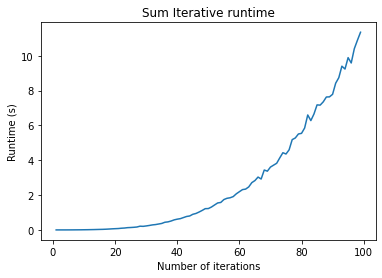

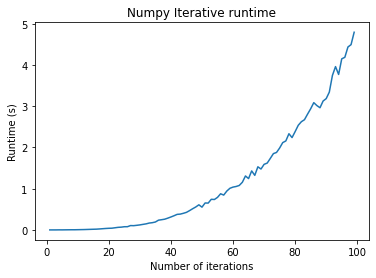

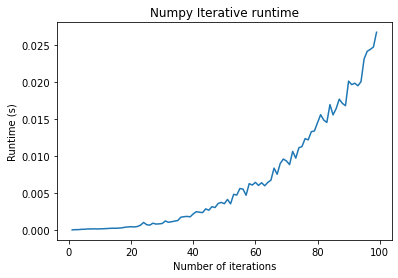

In [84]:
plt.figure()
plt.plot(n_vals, all_times[:, 0])
plt.title("Sum Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 1])
plt.title("Numpy Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 2])
plt.title("Numpy Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

### The Mandelbrot set and fractals

*Adapted from Loic Hebert's [book here](https://lhoupert.fr/test-jbook/04-code-vectorization.html#uniform-vectorization)*

Creation of the fractal Mandelbrot set involves defining a 2D lattice, and then iterating the following function at each lattice point:


$$
z_{t + 1} = z_{t}^2 + c
$$
where the complex number $z = x + i y$ encodes a 2D spatial position. This update rule is equivalent to the 2D update rule

$$
x_{t + 1} = x_t^2 - y_t^2 + c \\
y_{t + 1} = 2 x y 
$$

For the Mandelbrot set, we are interested in plotting, for each initial condition $z_0$, the asymptotic value $\lim_{n \rightarrow \infty} |z_n|$. For some points the set diverges.


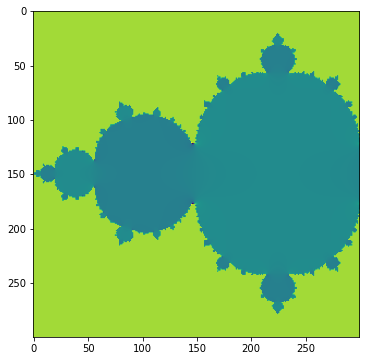

In [123]:


def mandelbrot_iterative(z, maxiter=20, horizon=2.0, c=-3/4):
    """
    An implementation of the Mandelbrot set using iterative loops
    We use the built-in complex type, although we could have also split into separate 
    iterations for the real and imaginary parts

    Args:
        z (complex): A 2D array of complex numbers to iterate
        maxiter (int): The maximum number of iterations to perform
        horizon (float): The maximum value of the magnitude of the complex number
        c (complex): The control parameter for the map
    """
    n, m = z.shape
    
    for i in range(n):
        for j in range(m):
            for t in range(maxiter):
                if abs(z[i, j]) >= horizon:
                    z[i, j] = horizon
                else:
                    z[i, j] = z[i, j]**2 + c#c[j, i]
    return z


# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 300), np.linspace(-1, 1, 300))
zz = xx + 1j * yy
horizon_vals = mandelbrot_iterative(zz)

plt.figure(figsize=(12, 6))
plt.imshow(np.real(horizon_vals), cmap="viridis")

Text(0.5, 1.0, 'Mandelbrot Set (Zoomed In)')

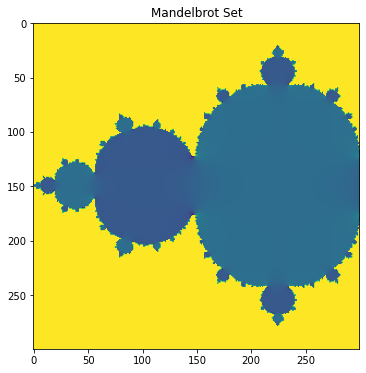

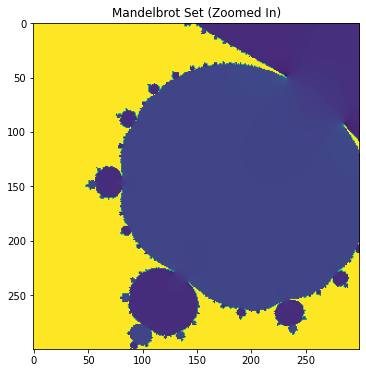

In [139]:
def mandelbrot_numpy(z, maxiter=20, horizon=2.0, c=-3/4):
    """
    A vectorized implementation of the Mandelbrot set using numpy
    """
    z = z.astype(np.complex64) # cast to numpy's own complex type
    for t in range(maxiter):
        z[np.abs(z) <= horizon] = z[np.abs(z) <= horizon]**2 + c
        z[np.abs(z) > horizon] = horizon

    return z

# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 300), np.linspace(-1, 1, 300))
zz = xx + 1j * yy
horizon_vals = mandelbrot_numpy(zz)

plt.figure(figsize=(12, 6))
plt.imshow(np.real(horizon_vals), cmap="viridis")
plt.title("Mandelbrot Set")


# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-0.4, -0.3, 300), np.linspace(-0.5, -0.6, 300))
zz = xx + 1j * yy
horizon_vals = mandelbrot_numpy(zz, maxiter=100)
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(horizon_vals), cmap="viridis")
plt.title("Mandelbrot Set (Zoomed In)")

In [148]:
import timeit

n_vals = np.arange(1, 100, 1)

# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 30), np.linspace(-1, 1, 30))
zz = xx + 1j * yy

all_times = []
for n in n_vals:
    time1 = timeit.timeit(
        "mandelbrot_iterative(zz, maxiter=n)", globals=globals(), number=n
    )
    time2 = timeit.timeit(
        "mandelbrot_numpy(zz, maxiter=n)", globals=globals(), number=n
    )
    all_times.append([time1, time2])
all_times = np.array(all_times)

Text(0, 0.5, 'Runtime (s)')

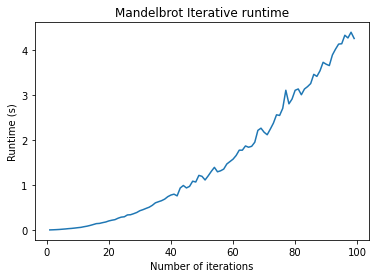

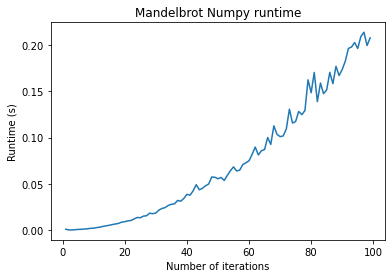

In [149]:
plt.figure()
plt.plot(n_vals, all_times[:, 0])
plt.title("Mandelbrot Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 1])
plt.title("Mandelbrot Numpy runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")